<a href="https://colab.research.google.com/github/Parvina-jon/Bitcoin-price-prediction/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22%D0%A2%D0%B5%D1%81%D1%82%D0%BE%D0%B2%D0%BE%D0%B5_%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_%D0%B4%D0%BB%D1%8F_%D0%BA%D0%BE%D0%BC%D0%BF%D0%B0%D0%BD%D0%B8%D0%B8_Tomorrow_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import sqlite3
from datetime import datetime, timedelta

# Создать данные для таблицы по клиентам
customers_data = {
    'customer_id': range(1, 11),
    'name': [f'Customer {i}' for i in range(1, 11)],
    'contact': [f'contact{i}@email.com' for i in range(1, 11)],
    'first_contact_date': pd.date_range(start='2022-01-01', periods=10, freq='D'),
    'status': ['active', 'active', 'lost', 'new', 'active', 'lost', 'new', 'active', 'active', 'lost']
}

# Создать данные для таблицы по продажам
sales_data = {
    'customer_id': [1,1,2,2,3,4,5,5,6,7,8,8,9,10],
    'amount': [100,200,150,300,250,100,400,200,150,100,500,300,450,200],
    'transaction_date': pd.date_range(start='2022-01-01', periods=14, freq='D')
}

# Создать Дата фрэймы
customers_df = pd.DataFrame(customers_data)
sales_df = pd.DataFrame(sales_data)

# Подключиться к базе SQL
conn = sqlite3.connect('customer_database.db')

# Сохранить датафрэймы в формате SQL таблиц
customers_df.to_sql('customers', conn, index=False, if_exists='replace')
sales_df.to_sql('sales', conn, index=False, if_exists='replace')

14

In [ ]:
# Визуализация таблиц
from IPython.display import display

print("\nStyled Tables:")
print("\nТаблица клиенты:")
display(customers_df.style.set_properties(**{
    'background-color': '#f5f5f5',
    'border-color': 'black',
    'border-style': 'solid',
    'border-width': '1px',
    'text-align': 'center'
}))

print("\nТаблица продажи:")
display(sales_df.style.set_properties(**{
    'background-color': '#f5f5f5',
    'border-color': 'black',
    'border-style': 'solid',
    'border-width': '1px',
    'text-align': 'center'
}))


Styled Tables:

Таблица клиенты:


,customer_id,name,contact,first_contact_date,status
0,1,Customer 1,contact1@email.com,2022-01-01 00:00:00,active
1,2,Customer 2,contact2@email.com,2022-01-02 00:00:00,active
2,3,Customer 3,contact3@email.com,2022-01-03 00:00:00,lost
3,4,Customer 4,contact4@email.com,2022-01-04 00:00:00,new
4,5,Customer 5,contact5@email.com,2022-01-05 00:00:00,active
5,6,Customer 6,contact6@email.com,2022-01-06 00:00:00,lost
6,7,Customer 7,contact7@email.com,2022-01-07 00:00:00,new
7,8,Customer 8,contact8@email.com,2022-01-08 00:00:00,active
8,9,Customer 9,contact9@email.com,2022-01-09 00:00:00,active
9,10,Customer 10,contact10@email.com,2022-01-10 00:00:00,lost



Таблица продажи:


,customer_id,amount,transaction_date
0,1,100,2022-01-01 00:00:00
1,1,200,2022-01-02 00:00:00
2,2,150,2022-01-03 00:00:00
3,2,300,2022-01-04 00:00:00
4,3,250,2022-01-05 00:00:00
5,4,100,2022-01-06 00:00:00
6,5,400,2022-01-07 00:00:00
7,5,200,2022-01-08 00:00:00
8,6,150,2022-01-09 00:00:00
9,7,100,2022-01-10 00:00:00


In [ ]:
# Посчитать LTV и выделить сегменты клиентов
query = """
SELECT
    c.customer_id,
    c.name,
    c.status,
    c.first_contact_date,
    COUNT(s.transaction_date) as total_transactions,
    SUM(s.amount) as ltv,
    MAX(s.transaction_date) as last_transaction_date
FROM customers c
LEFT JOIN sales s ON c.customer_id = s.customer_id
GROUP BY c.customer_id
"""

results_df = pd.read_sql_query(query, conn)

# Посчитать колличество дней с последней сделки
current_date = datetime.now()
results_df['days_since_last_transaction'] = (current_date - pd.to_datetime(results_df['last_transaction_date'])).dt.days

# Посчитать среднюю цену сделки
results_df['avg_transaction_value'] = results_df['ltv'] / results_df['total_transactions']

# Отобразить результаты
print("\nРезультаты анализа по клиентам:")
print(results_df)

# Посчитать ключевые метрики
print("\nКлючевые метрики:")
print(f"Средний LTV: ${results_df['ltv'].mean():.2f}")
print(f"Всего активных клиентов: {len(results_df[results_df['status'] == 'active'])}")
print(f"Всего потерянных клиентов: {len(results_df[results_df['status'] == 'lost'])}")
print(f"Всего новых клиентов: {len(results_df[results_df['status'] == 'new'])}")


Результаты анализа по клиентам:
   customer_id         name  status   first_contact_date  total_transactions  \
0            1   Customer 1  active  2022-01-01 00:00:00                   2   
1            2   Customer 2  active  2022-01-02 00:00:00                   2   
2            3   Customer 3    lost  2022-01-03 00:00:00                   1   
3            4   Customer 4     new  2022-01-04 00:00:00                   1   
4            5   Customer 5  active  2022-01-05 00:00:00                   2   
5            6   Customer 6    lost  2022-01-06 00:00:00                   1   
6            7   Customer 7     new  2022-01-07 00:00:00                   1   
7            8   Customer 8  active  2022-01-08 00:00:00                   2   
8            9   Customer 9  active  2022-01-09 00:00:00                   1   
9           10  Customer 10    lost  2022-01-10 00:00:00                   1   

   ltv last_transaction_date  days_since_last_transaction  \
0  300   2022-01-02 00:00

#Метрики, которые улучшат работу с клиентами


Для более эффективной работы с клиентами можно рассмотреть следующие метрики:

 1) **Показатель вовлечённости клиента** (Engagement score) демострирует уровень взаимодействие клиента с компанией, частоту посещения сайтов и других ресурсов компании,а также денежную ценность, которую клиент представляет для компании, а также данная метрика полезна для выстраивания более эффективной коммуникации с клиентом чтобы определить, какие клиенты требуют внимания, прежде чем они станут неактивными.

2) **Показатель удержания клиента** (Retantion rate) демонстрирует непосредственно эффективность удержания. Считать её необходимо для того, чтобы понимать, насколько эффективно работают инструменты компании. Чем выше показатель, тем лучше работает стратегия удержания компании.

3) **Среднее время между покупками** (Average Time Between Purchases) помогает определить оптимальное время для последующих коммуникаций с клиентом и обнаружить ранние признаки оттока клиентов.

In [ ]:
def calculate_engagement_score(row):
    recency_score = 100 - min(row['days_since_last_transaction'], 100)  # Наибольший показатель недавних сделок
    frequency_score = min(row['total_transactions'] * 10, 100)  # Показатель основанный на частоте сделок
    monetary_score = min(row['ltv'] / 100, 100)  # Показатель основанный на расходах за всё время

    return (recency_score + frequency_score + monetary_score) / 3

results_df['engagement_score'] = results_df.apply(calculate_engagement_score, axis=1)

<ipython-input-15-cb9a3fa5004c>:17: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=results_df, x='engagement_score', hue='status', fill=True)


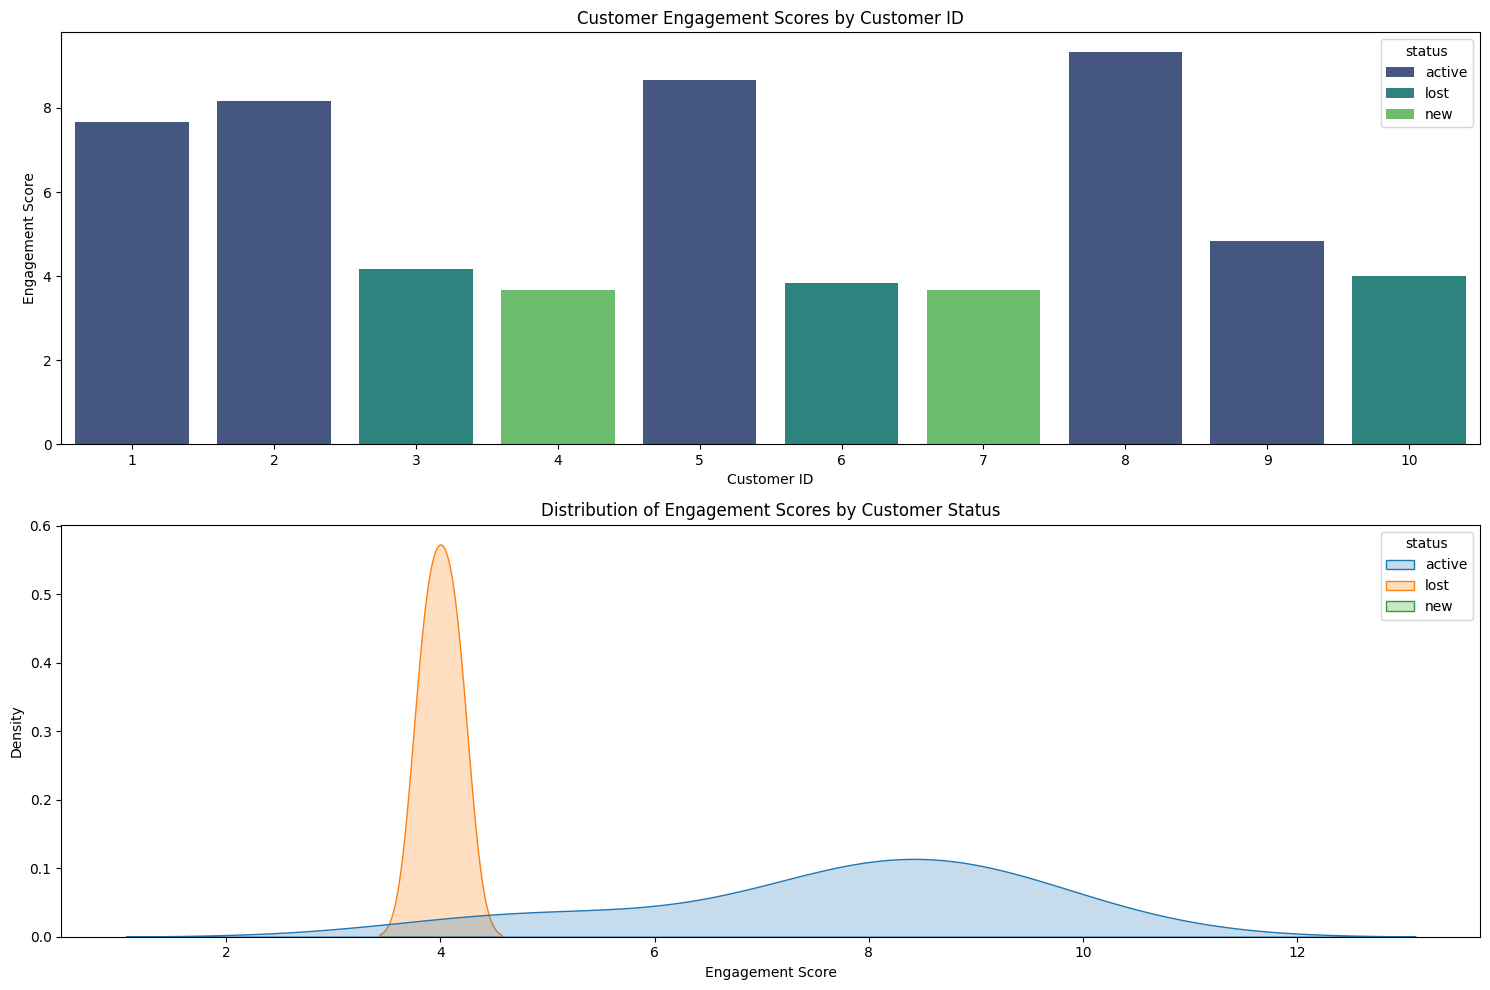

,count,mean,min,max
status,,,,
active,5,7.730000,4.830000,9.330000
lost,3,4.000000,3.830000,4.170000
new,2,3.670000,3.670000,3.670000



Engagement Score Summary by Status:


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Визуализация коэффициента вовлечённости
plt.figure(figsize=(15, 10))

# 1. Main Plot: Коэффициент вовлечённости по клиенту
plt.subplot(2, 1, 1)
sns.barplot(x='customer_id', y='engagement_score', data=results_df,
            hue='status', palette='viridis')
plt.title('Customer Engagement Scores by Customer ID', fontsize=12)
plt.xlabel('Customer ID')
plt.ylabel('Engagement Score')

# 2. Distribution Plot: Распределение коэффициента вовлечённости
plt.subplot(2, 1, 2)
sns.kdeplot(data=results_df, x='engagement_score', hue='status', fill=True)
plt.title('Distribution of Engagement Scores by Customer Status', fontsize=12)
plt.xlabel('Engagement Score')
plt.ylabel('Density')

plt.tight_layout()
plt.show()

# Отобразить итоговую статистику
summary_stats = results_df.groupby('status')['engagement_score'].agg([
    'count', 'mean', 'min', 'max'
]).round(2)

print("\nEngagement Score Summary by Status:")
display(summary_stats.style.background_gradient(cmap='YlOrRd'))

In [ ]:
retention_rate = (len(results_df[results_df['status'] == 'active']) / len(results_df)) * 100
print(f"Customer Retention Rate: {retention_rate:.2f}%")

Customer Retention Rate: 50.00%


In [ ]:
query_time_between = """
SELECT
    customer_id,
    AVG(days_between) as avg_days_between_purchases
FROM (
    SELECT
        customer_id,
        JULIANDAY(transaction_date) - JULIANDAY(LAG(transaction_date) OVER (PARTITION BY customer_id ORDER BY transaction_date)) as days_between
    FROM sales
)
WHERE days_between IS NOT NULL
GROUP BY customer_id
"""

time_between_df = pd.read_sql_query(query_time_between, conn)

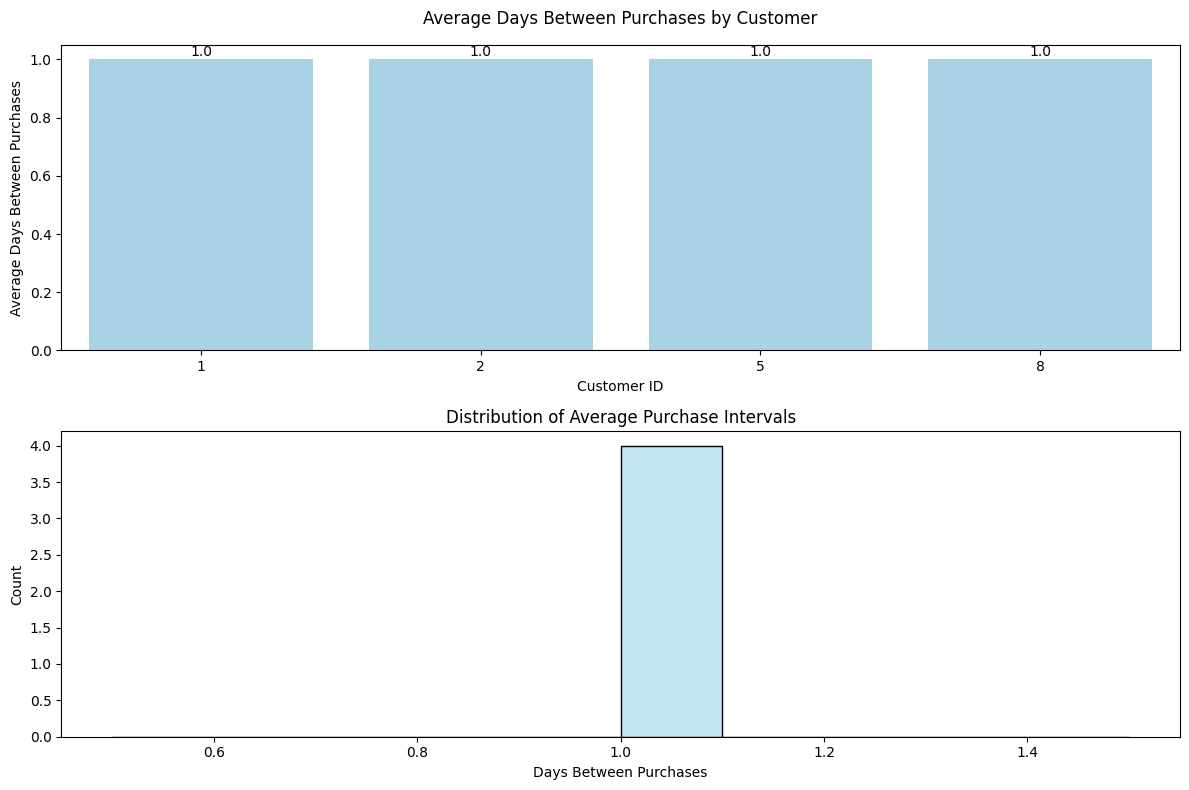


Purchase Interval Statistics:
count: 4.0
mean: 1.0
std: 0.0
min: 1.0
25%: 1.0
50%: 1.0
75%: 1.0
max: 1.0


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Построить фигуру для изображания метрики Среднее время между покупками
plt.figure(figsize=(12, 8))

# Построить барплот
plt.subplot(2, 1, 1)
sns.barplot(x='customer_id', y='avg_days_between_purchases', data=time_between_df,
            color='skyblue', alpha=0.8)
plt.title('Average Days Between Purchases by Customer', fontsize=12, pad=15)
plt.xlabel('Customer ID')
plt.ylabel('Average Days Between Purchases')

for i, v in enumerate(time_between_df['avg_days_between_purchases']):
    plt.text(i, v, f'{v:.1f}', ha='center', va='bottom')

# Показать распределение
plt.subplot(2, 1, 2)
sns.histplot(data=time_between_df, x='avg_days_between_purchases', bins=10,
             color='skyblue', kde=True)
plt.title('Distribution of Average Purchase Intervals', fontsize=12)
plt.xlabel('Days Between Purchases')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Отобразить общую статистику
print("\nPurchase Interval Statistics:")
stats_summary = time_between_df['avg_days_between_purchases'].describe().round(2)
for stat, value in stats_summary.items():
    print(f"{stat}: {value}")

<ipython-input-19-727aac4f32b9>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='status', y='engagement_score', data=results_df, palette='viridis')


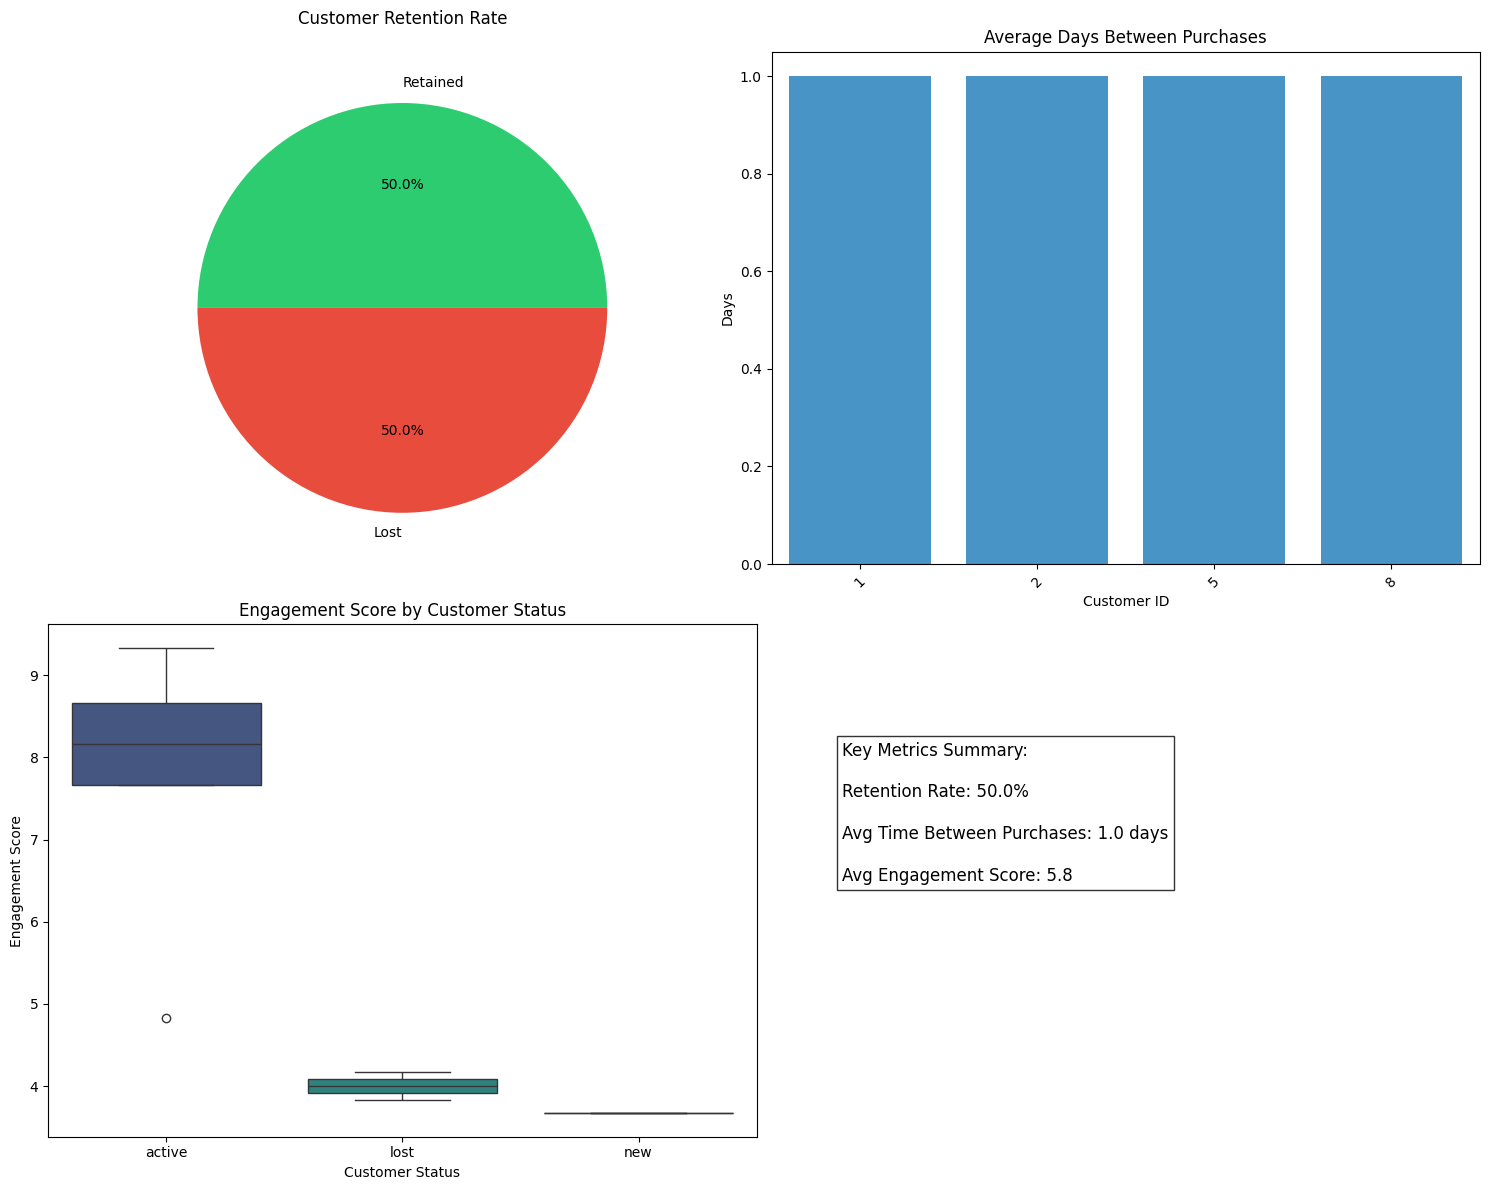

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Посчитать показатель удержания клиента
retention_rate = (len(results_df[results_df['status'] == 'active']) / len(results_df)) * 100

# Построить фигуру с тремя сабплотами
fig = plt.figure(figsize=(15, 12))

# 1. Показатель удержания клиента - Пай чарт
plt.subplot(2, 2, 1)
retention_labels = ['Retained', 'Lost']
retention_sizes = [retention_rate, 100-retention_rate]
colors = ['#2ecc71', '#e74c3c']
plt.pie(retention_sizes, labels=retention_labels, colors=colors, autopct='%1.1f%%')
plt.title('Customer Retention Rate', pad=20)

# 2. Среднее время между покупками
plt.subplot(2, 2, 2)
sns.barplot(data=time_between_df, x='customer_id', y='avg_days_between_purchases', color='#3498db')
plt.title('Average Days Between Purchases')
plt.xticks(rotation=45)
plt.xlabel('Customer ID')
plt.ylabel('Days')

# 3.Показатель вовлечённости клиента
plt.subplot(2, 2, 3)
sns.boxplot(x='status', y='engagement_score', data=results_df, palette='viridis')
plt.title('Engagement Score by Customer Status')
plt.xlabel('Customer Status')
plt.ylabel('Engagement Score')

# Добавить текст с ключевыми метриками
plt.subplot(2, 2, 4)
plt.axis('off')
stats_text = (
    f"Key Metrics Summary:\n\n"
    f"Retention Rate: {retention_rate:.1f}%\n\n"
    f"Avg Time Between Purchases: {time_between_df['avg_days_between_purchases'].mean():.1f} days\n\n"
    f"Avg Engagement Score: {results_df['engagement_score'].mean():.1f}"
)
plt.text(0.1, 0.5, stats_text, fontsize=12, bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

#Выводы:
На основании проведённого анализа по предложенным метриками для улучшения работы с клиентами можно сделать следующие выводы:

1) Коэффициент удержания 50% указывает на сильную лояльность клиентов, при этом половина клиентов возвращаются для повторных сделок. Это обеспечивает стабильную основу для роста.

2) Коэффициент вовлеченности 5,8% работает хорошо, особенно если это касается социальных сетей или кампаний по электронной почте, где средние показатели по отрасли обычно колеблются от 1 до 3%. Аудитория активно взаимодействует с контентом почти вдвое чаще, чем обычно.

3) Среднее время между покупками 1 день — это отлично! Это указывает на высоко вовлеченных клиентов с частым покупательским поведением. Данный показатель говорит о том, что продукт или услуга стали частью обычной рутины клиентов, что идеально подходит для устойчивого роста бизнеса.

Основные возможности:

Развивайте сильное удержание, внедряя VIP-программу для лояльных клиентов
Используйте свой коэффициент вовлеченности выше среднего для тестирования новых форматов контента
Извлекайте выгоду из модели частых покупок, внедряя дополнительные продукты или услуги.